# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing two different dictionary initalization strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'DICT_INIT'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method='HAP',
              learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 256) - done in 0.13s.


## White Noise Initialization + Learning

No cache found /tmp/data_cache/DICT_INIT_WHITE_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   4096 (elapsed time:   0s,  0.0mn)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (576,) (100,)
Iteration  410 /   4096 (elapsed time:  5179s,  86.0mn)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (576,) (100,)
Iteration  820 /   4096 (elapsed time:  9029s,  150.0mn)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (576,) (100,)
Iteration  1230 /   4096 (elapsed time:  12742s,  212.0mn)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (576,) (100,)
Iteration  1640 /   4096 (elapsed time:  16411s,  273.0mn)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (576,) (100,)
Iteration  2050 /   4096 (elapsed time:  21258s,  354.0mn)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (576,) (100,)
Iteration  2460 /   4096 (elapsed time:  24943s,  415.0mn)
(100,) (576,) (100,)
(100,) (576,) (100,)
(100,) (57

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


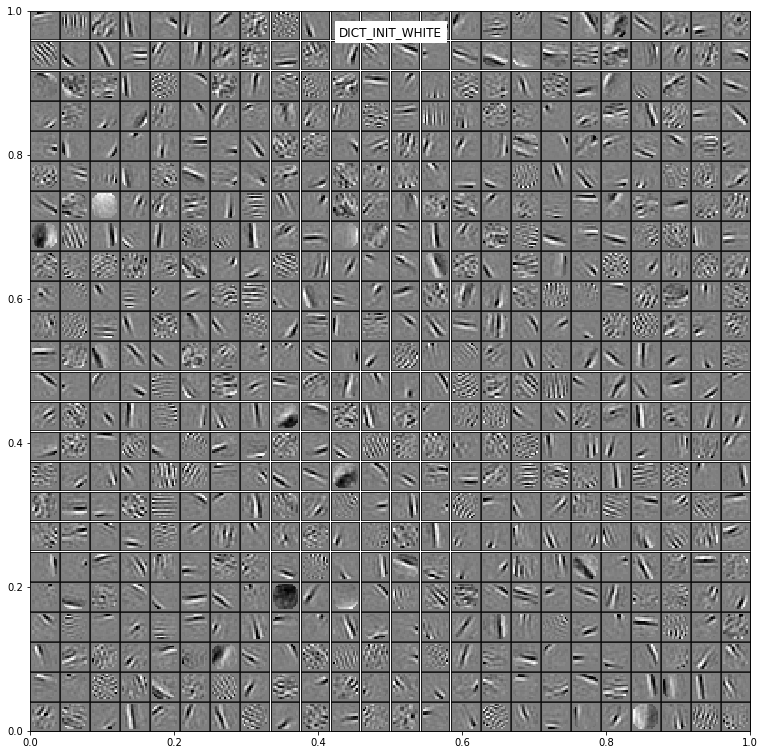

In [ ]:
matname = tag + '_WHITE'
shl = SHL(one_over_F=False, **opts)
dico_w = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## 1/f Noise Initialization + Learning

In [ ]:
matname = tag + '_OVF'
shl = SHL(one_over_F=True, **opts)
dico_1oF = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

No cache found /tmp/data_cache/DICT_INIT_OVF_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   4096 (elapsed time:   1s,  0.0mn)
Iteration  410 /   4096 (elapsed time:  3874s,  64.0mn)
Iteration  820 /   4096 (elapsed time:  7486s,  124.0mn)
Iteration  1230 /   4096 (elapsed time:  11493s,  191.0mn)
Iteration  1640 /   4096 (elapsed time:  15136s,  252.0mn)
Iteration  2050 /   4096 (elapsed time:  19551s,  325.0mn)
Iteration  2460 /   4096 (elapsed time:  23000s,  383.0mn)
Iteration  2870 /   4096 (elapsed time:  26260s,  437.0mn)


In [ ]:
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_w, variable='error', fig=fig_error, ax=ax_error, color='blue', label='white')
fig_error, ax_error = shl.time_plot(dico_1oF, variable='error', fig=fig_error, ax=ax_error, color='red', label='1/f')
ax_error.set_ylim((0, .65))
ax_error.legend(loc='best');